In [88]:
import numpy as np
from skimage import io, data, transform, exposure
import matplotlib.pyplot as plt
from skimage.util.dtype import img_as_float, img_as_float32

In [89]:
def mapping(img):
    nimg = img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

# Questão 1
Calcule o histograma da seguinte imagem. 


<center>
<img src="https://drive.google.com/uc?id=167--1z0ZSaLTjiRZPonKnhm2S8pvqabj" alt="Drawing" style="width: 250px;"/>
</center>

Através dele poderá obversar que as intensidades estão concentradas na metade da escala de intensidades, não sendo possível distinguir claramente os detalhes da imagem. Corrija esse problema por meio das seguintes funções radiométricas.

1.   Use a função *exposure.adjust_gamma()*.
2.   Função *contrast-stretching* $$s = T(r) = \frac{1}{1 + (m/r)^E}$$ onde $r$ denota a intensidade da imagem, $m$ é um valor dentro do intervalo [0,1] e $E$ um valor positivo.

<center>
<img src="https://drive.google.com/uc?id=1hPgC1WDTmuU8A2E6AeEXPmanf_vW81_a" alt="Drawing" width="230" />
</center>

3. Tranformação *Power-law* (também conhecida como função *Gamma*)
    $$s = cr^\lambda$$ onde $c$ e $\lambda$ são constantes positivas.
<center>
<img src="https://drive.google.com/uc?id=16lffZmhq9mzzQ57haDY_zi1EOSwPELJo" alt="Drawing" width="300" class="center"/>
</center>


In [90]:
img1 = io.imread("https://drive.google.com/uc?id=167--1z0ZSaLTjiRZPonKnhm2S8pvqabj")
img2 = io.imread("https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb")


### 1.1 Usar a função exposure.adjust_gamma

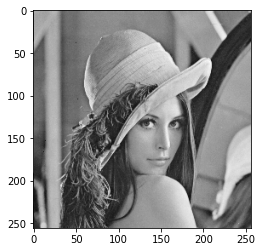

In [91]:
plt.imshow(img1,cmap="gray")

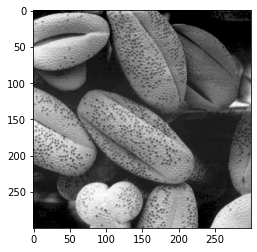

In [92]:
plt.imshow(img2,cmap="gray")

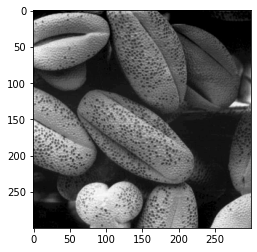

In [93]:
img3 = exposure.adjust_gamma(img2,gamma=3,gain=3)
plt.imshow(img3,cmap="gray")

### 1.2.a Implementar o código para graficar a função *contrast streaching*

<center>
<img src="https://drive.google.com/uc?id=1hPgC1WDTmuU8A2E6AeEXPmanf_vW81_a" alt="Drawing" width="230" />
</center>

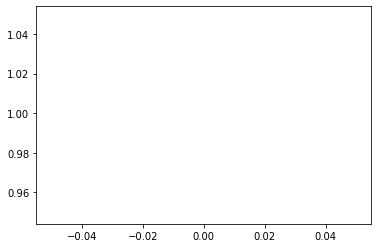

In [94]:
# evita a mensagem de warning por divisão por zero
np.seterr(divide='ignore', invalid='ignore')



def constrast_streching_function(m, E):
    return 1/(1+(m/r)**E)

f = constrast_streching_function(m = 0.5, E = 10)
plt.plot(f)

## 1.2 Implementar código que permita aplicar a função *constrast streaching* em imagens





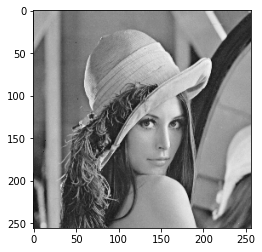

In [95]:
def constrast_streaching(img, m=0.5, E=8):
    x,y = img.shape
    auximg=mapping(img)
    for i in range(x):
      for j in range(y):
        auximg[i,j]=1/(1+((m/img[i,j])**E))
        return auximg
    

nimg = constrast_streaching(img1)
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

### 1.3 Implementar código que permita aplicar a função *Power Law* em imagens

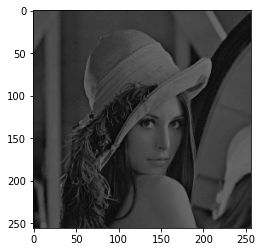

In [102]:
def power_law(img, c=1, xlambda=2):
    x,y = img.shape
    auximg=img
    for i in range(x):
      for j in range(y):
        auximg[i,j]=c*(img[i,j]**xlambda)
        return auximg

nimg = power_law(img1, c = 3, xlambda=2)
plt.imshow( mapping(nimg), cmap='gray', vmin=0, vmax=1 )

# Questão 2

A tranformação Wave é definida como:
    \begin{eqnarray}
    nx(x,y) &=& x + 20 sin (2*\pi * y / 150) \nonumber  \\
    ny(x,y) &=& y \nonumber
    \end{eqnarray}
onde $x$ e $y$ representam as coordenadas atuais da imagem, e $nx$ e $ny$ são as novas coordenas depois da transformação.

O efeito gerado com a função é o seguinte:
<center>
<img src="https://drive.google.com/uc?id=1xXN1wY_Zdj6w8BIkF2PIU1Z99RI5OwDf" alt="Drawing" width="230" />
</center>



In [97]:
def wave(xy):
    xy[:, 1] += 12*np.sin(2*np.pi*xy[:, 0]/150)
    return xy

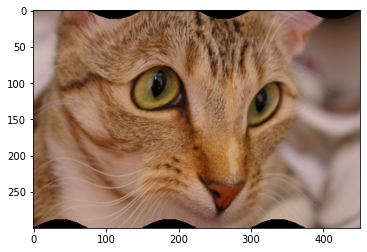

In [98]:
im = data.chelsea()
nimg = transform.warp(im, wave)
plt.imshow(nimg)

### Modifique o código para gerar o seguinte efeito:

<center>
<img src="https://drive.google.com/uc?id=1peV9ks80_w3mI5fDjD6h7uPqEINzxA0a" alt="Drawing" width="300" />
</center>


In [113]:
def wave2(xy):
    xy[:, 1] += 12*np.sin(2*np.pi*xy[:, 0]/150)
    xy[:, 0] += 12*np.sin(2*np.pi*xy[:, 1]/150)
    return xy

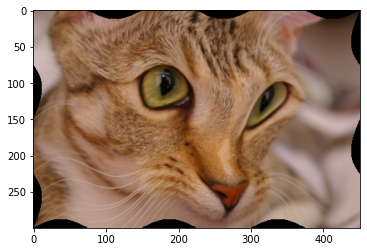

In [114]:
nimg = transform.warp(im, wave2)
plt.imshow(nimg)